In [10]:
%load_ext autoreload
%autoreload 2

import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import os
import rdkit.Chem as Chem

import datamol as dm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


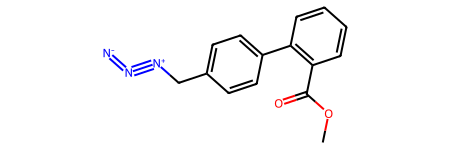

In [21]:
m1 = Chem.MolFromSmiles('COC(=O)C1=C(C=CC=C1)C1=CC=C(C[N+]#[N]=[N-])C=C1',sanitize=False)
m1

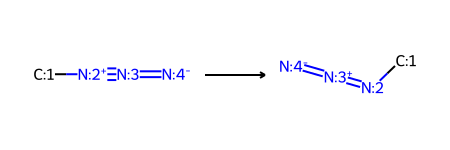

In [23]:
from rdkit.Chem import rdChemReactions

REACTION_SMARTS = '[#6:1]-[N+:2]#[N:3]=[N-:4]>>[#6:1]-[N+0:2]=[N+1:3]=[N-:4]'
tf1 = rdChemReactions.ReactionFromSmarts(REACTION_SMARTS)
tf1


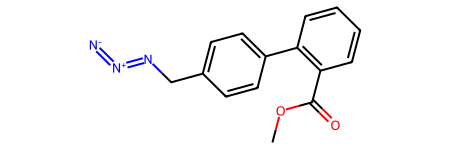

In [53]:
from cchtools.chem.reactions import Reaction
from cchtools.constants import HB_REACTIONS, EXAMPLES_SDF

rxn = Reaction(REACTION_SMARTS)

out = rxn.run_reactants([m1])
display(out[0])

In [31]:
mol = Chem.SDMolSupplier(EXAMPLES_SDF)[0]

#rxn.run_reactants([mol])

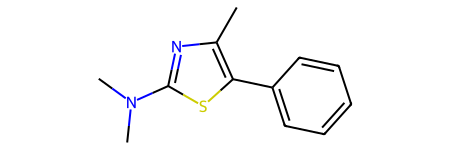

In [64]:
import rdkit.Chem.AllChem as AllChem

# Hantzsch thiazole synthesis
thiourea = Chem.MolFromSmiles('CN(C)C(=S)N')
haloketone = Chem.MolFromSmiles('c1ccccc1C(=O)C(C)Cl')
rxn_smarts = '[NH2:1][C:2](=[S:3])[NH0:4].[C:5](=[O:6])[C:7][Cl:8]>>[N:4][c:2]1[s:3][c:5][c:7][n:1]1'
# for flattening tuples and lists
from itertools import chain
rxn = AllChem.ReactionFromSmarts(rxn_smarts)
product = rxn.RunReactants((thiourea, haloketone))
product = list(chain.from_iterable(product))
#Chem.SanitizeMol(product)
product[0]

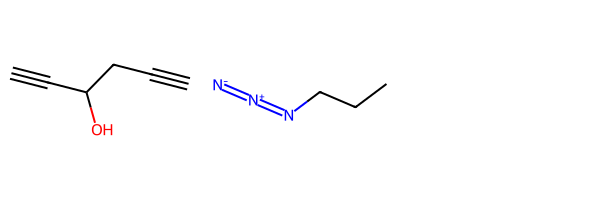

In [70]:
from rdkit.Chem import Draw

diyne_smiles = 'C#CCC(O)C#C'
azide_smiles = 'CCCN=[N+]=[N-]'

diyne = Chem.MolFromSmiles(diyne_smiles)
azide = Chem.MolFromSmiles(azide_smiles)

Draw.MolsToGridImage([diyne, azide])

In [65]:
# define reaction
copper_click_smarts = '''
[CH:1]#[C:2].[N:3]=[N+:4]=[N-:5]>>
[c:1]1[c:2][n-0:3][n-0:4][n-0:5]1.
[c:2]1[c:1][n-0:3][n-0:4][n-0:5]1
'''

copper_click = AllChem.ReactionFromSmarts(copper_click_smarts)

In [67]:
ethanol = Chem.MolFromSmiles('CCO')
isopropanol = Chem.MolFromSmiles('CC(C)O')
phenol = Chem.MolFromSmiles('c1cccc(O)c1')
t_butanol = Chem.MolFromSmiles('C(C)(C)(C)O')
glycerol = Chem.MolFromSmiles('OCC(O)CO')

In [71]:
products_tuples = copper_click.RunReactants((diyne, azide))
products = list(chain.from_iterable(products_tuples))
[Chem.SanitizeMol(prod) for prod in products]

[rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE,
 rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE,
 rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE,
 rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE]

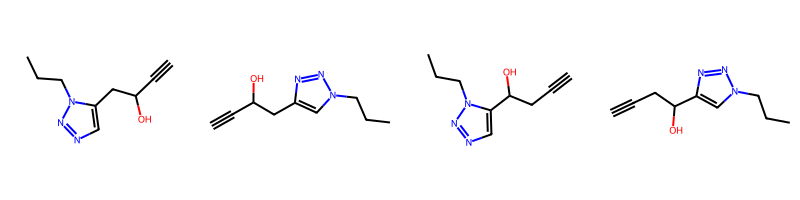

In [78]:
from cchtools.chem.reactions import Reaction

reaction = Reaction(copper_click_smarts)
products = reaction.run_reactants([diyne, azide])
Draw.MolsToGridImage(products, molsPerRow = 4)

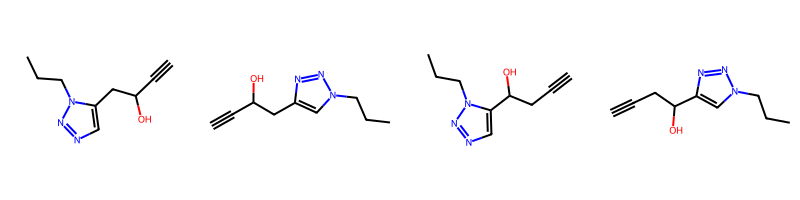

In [72]:
Draw.MolsToGridImage(products, molsPerRow = 4)
